In [1]:
%load_ext autoreload
%autoreload 2

# Test LineString

In [19]:
from pylanelet import PyLineString, LineType, Lanelet2Converter, PyLaneLet
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.__file__

'/home/zixu/mambaforge/envs/ros_base/lib/python3.9/site-packages/numpy/__init__.py'

(-0.1, 2.1, -1.0585943368655073, 0.22148285030606202)

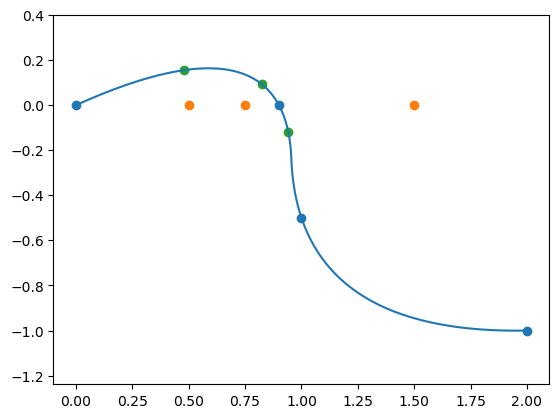

In [5]:
points = np.array([[0, 0.9, 1, 2], [0, 0, -0.5, -1]]).T
l1 = PyLineString(1, points, LineType.WHITE_SOLID)
sample = l1.sample_points(0, 1, 10)
plt.scatter(points[:,0], points[:,1])
plt.plot(sample[:,0], sample[:,1])

project = np.array([[0.5, 0], [0.75, 0], [1.5, 0]])
projected = l1.project_points(project)
plt.scatter(project[:,0], project[:,1])
plt.scatter(projected[:,0], projected[:,1])
plt.axis('equal')

In [6]:
import lanelet2
from lanelet2.core import BasicPoint2d, BasicPoint3d
from lanelet2.projection import LocalCartesianProjector
from lanelet2.geometry import to2D, toArcCoordinates, fromArcCoordinates, ArcCoordinates

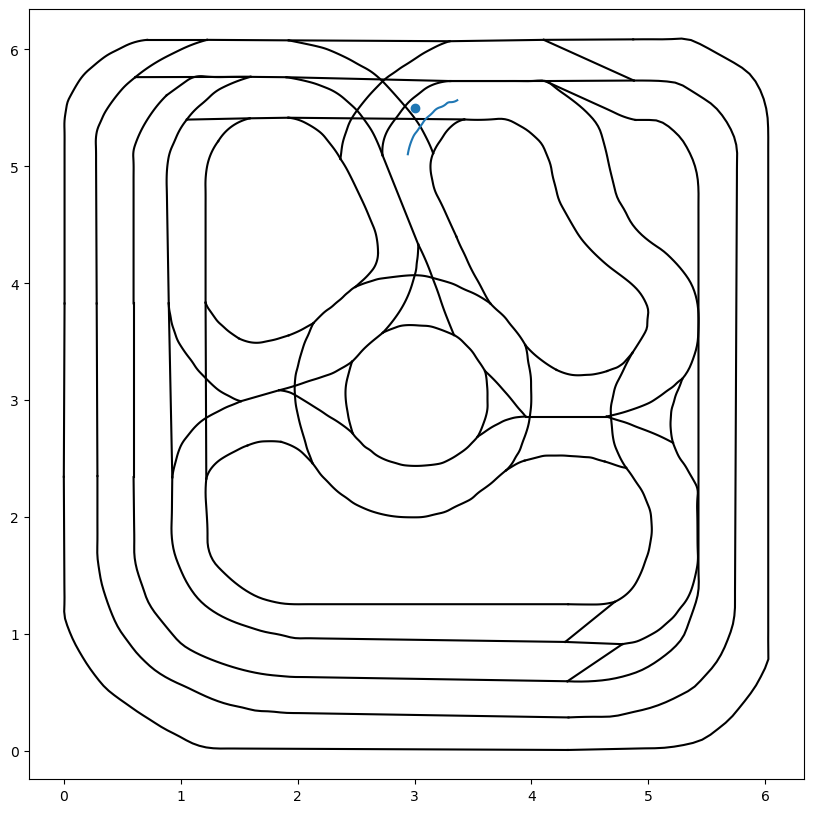

In [236]:
converter = Lanelet2Converter(osm)
pt = np.array([3, 5.5, 0.25*np.pi])
closest, _ = converter.pylanelet_map.get_closest_lanelet(pt, True)
converter.plot_map()
pts = closest.center_line.sample_points(0, 1, 20)
plt.scatter(pt[0], pt[1])
plt.plot(pts[:,0], pts[:,1])

Building graph with lane change cost:  2
21.523030097876422


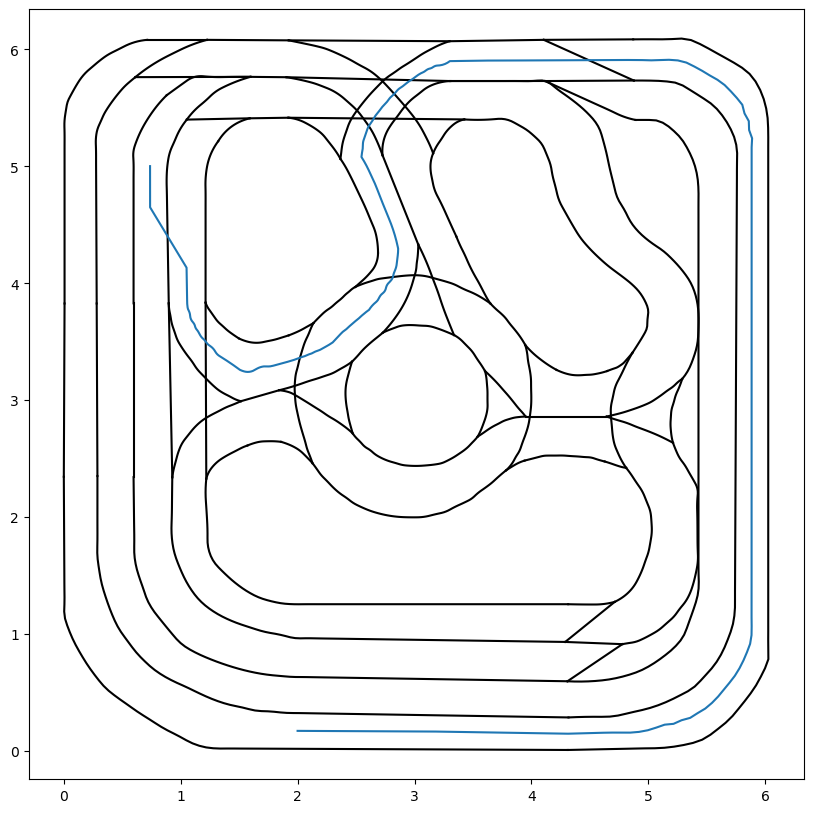

In [249]:
lanelet_map = converter.pylanelet_map
lanelet_map.build_graph(2)
start = np.array([2, 0.15])
end = np.array([0.8, 5])
path = lanelet_map.get_shortest_path(start, end)
converter.plot_map()
plt.plot(path[:,0], path[:,1])